In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
RSEED = 42

In [139]:
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

In [140]:
df = pd.read_csv("Train.csv")

## Using all features

In [141]:
#define X and y values
X = df.drop(['target', 'ward', 'ADM4_PCODE'], axis=1)
y = df["target"]

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

In [142]:
#X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)


In [143]:
#evaluation metrics
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {r2_score(y_test, y_pred)}")

RMSE: 4.96291255032611
R2: 0.7538023436015499


/Users/christinemerkel/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='target'>

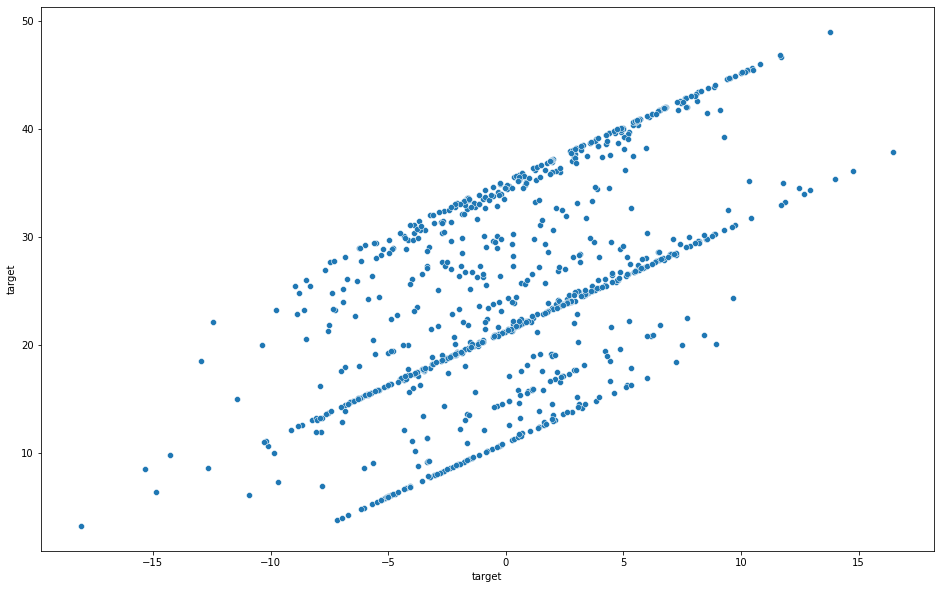

In [144]:
residuals = y_test - y_pred

#residual plot test data
residuals
sns.scatterplot(residuals ,y_test)

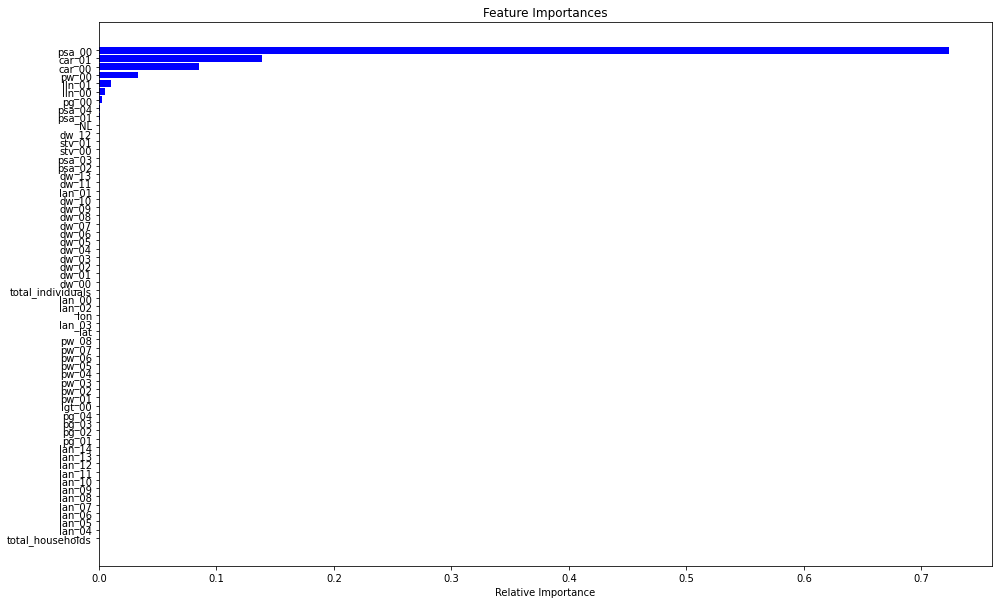

In [145]:
features = X.columns
importances = regr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
#sns.barplot(range(len(indices)), importances[indices])



In [146]:
indices

array([ 0, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 30, 58, 29, 27,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 28, 13, 15, 18, 19, 21, 22, 14, 59,
       17, 20, 42, 25, 26, 48, 23, 24, 16])

In [147]:
importances
b = list(zip(importances, df.columns))
importances

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.23734645e-01, 6.26142411e-04, 0.00000000e+00, 0.00000000e+00,
       1.02216402e-03, 0.00000000e+00, 0.00000000e+00, 8.48137775e-02,
       1.39202465e-01, 4.90644709e-03, 1.01918410e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.26383939e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.32386786e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [148]:
t = list(zip([features[i] for i in indices], importances[indices]))



In [149]:
h = pd.DataFrame(t)

In [150]:
a = pd.DataFrame(data=t, columns=['features', 'importances'])
a.sort_values(ascending=False, by='importances').head()

,features,importances
59,psa_00,0.723735
58,car_01,0.139202
57,car_00,0.084814
56,pw_00,0.033239
55,lln_01,0.010192


# Random Forest Regression with best features only

In [161]:
# Features : psa_00, car_01, pw_00, lln_01 
best_features = ['psa_00', 'car_01', 'pw_00', 'lln_01', 'pg_00']

#define X and y values
X = df[best_features]
y = df["target"]

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

In [152]:
#X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr_best = RandomForestRegressor(max_depth=2, random_state=0)
regr_best.fit(X_train, y_train)

y_pred = regr_best.predict(X_test)


In [153]:
#evaluation metrics
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {r2_score(y_test, y_pred)}")

RMSE: 4.964593019781389
R2: 0.7536355876159995


# Hyperparamater Tuning

In [154]:
# https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [155]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/christinemerkel/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/christinemerkel/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/christinemerkel/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/christinemerkel/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.2s
[CV] END bootstrap=True, max_depth=10, ma

In [156]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [157]:
rf_hp = RandomForestRegressor(**rf_random.best_params_)

rf_hp.fit(X_train, y_train)



RandomForestRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=1000)

In [158]:
y_pred = rf_hp.predict(X_test)


In [159]:
#evaluation metrics
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {r2_score(y_test, y_pred)}")

RMSE: 3.891762389026036
R2: 0.8486078689576713


/Users/christinemerkel/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='target'>

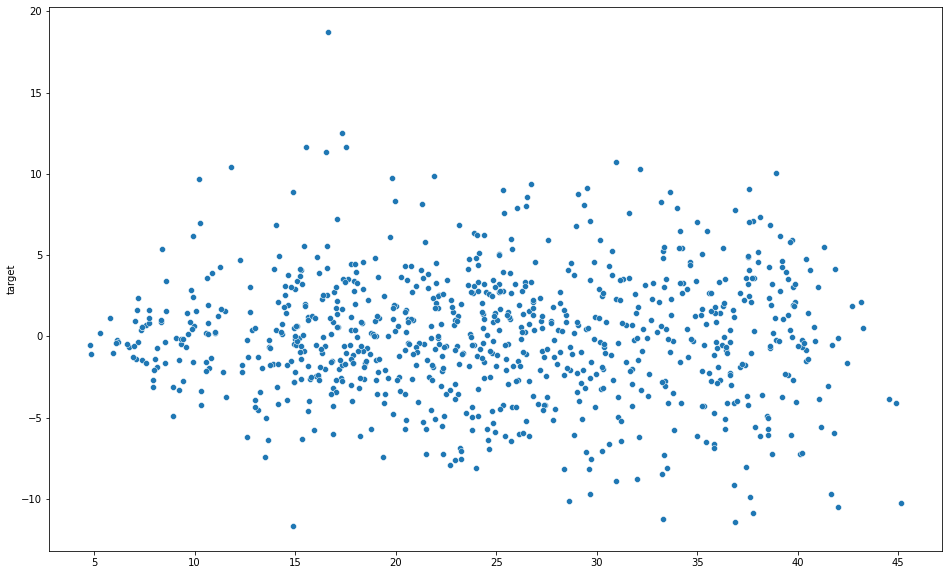

In [160]:
residuals = y_test - y_pred
sns.scatterplot(y_pred, residuals)

## Stacking Regression

In [168]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import HistGradientBoostingRegressor

lasso_pipeline = make_pipeline(linear_preprocessor, LassoCV())
lasso_pipeline



rf_pipeline = make_pipeline(tree_preprocessor, RandomForestRegressor(random_state=42))
rf_pipeline



gbdt_pipeline = make_pipeline(
    tree_preprocessor, HistGradientBoostingRegressor(random_state=0)
)
gbdt_pipeline


estimators = [
    ("Random Forest", rf_pipeline),
    ("Lasso", lasso_pipeline),
    ("Gradient Boosting", gbdt_pipeline),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_regressor

NameError: name 'make_pipeline' is not defined